# Logistic Regression

In [1]:
import pandas as pd
from IPython.core.display import display
df = pd.read_csv("../data/interim/ecommerce_data-cleaned-0.2.2.csv", index_col=0)
display(df)

,brand,name,description,category_raw,price_raw,discount_raw,price_range
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93,"(30, 35]"
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48,"(10, 20]"
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99,"(10, 20]"
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59,"(35, 40]"
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81,"(0, 10]"
...,...,...,...,...,...,...,...
29994,NineChef,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,We aim to show you accurate product informati...,"Food | Snacks, Cookies & Chips | Chips & Crisp...",45.99,45.99,"(45, 50]"
29996,Shock Sox,Shock Sox Fork Seal Guards 29-36mm Fork Tube 4...,We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Components | ...,33.25,33.25,"(30, 35]"
29997,Princes,Princes Gooseberries 300g,We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",8.88,8.88,"(0, 10]"
29998,Create Ion,Create Ion Grace 3/4 Inches Straight Hair Iron...,We aim to show you accurate product informati...,Beauty | Hair Care | Hair Styling Tools | Flat...,50.00,24.50,"(45, 50]"


In [6]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
df['encoded'] = lab_enc.fit_transform(df.price_range)

In [7]:
df_new = df[['name','encoded']]
display(df_new)

,name,encoded
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",5
1,Equate Triamcinolone Acetonide Nasal Allergy S...,1
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,1
3,"24"" Classic Adjustable Balloon Fender Set Chro...",6
4,Elephant Shape Silicone Drinkware Portable Sil...,0
...,...,...
29994,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,8
29996,Shock Sox Fork Seal Guards 29-36mm Fork Tube 4...,5
29997,Princes Gooseberries 300g,0
29998,Create Ion Grace 3/4 Inches Straight Hair Iron...,8


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn import utils

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_new.name).toarray()
labels = df_new.encoded
features.shape

(29604, 12942)

In [10]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for name, encoded in sorted(df_new.items()):
  features_chi2 = chi2(features, labels == encoded)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(name))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'encoded':
  . Most correlated unigrams:
. dura
. zoro
  . Most correlated bigrams:
. duro tubes
. dusk dawn
# 'name':
  . Most correlated unigrams:
. dura
. zoro
  . Most correlated bigrams:
. duro tubes
. dusk dawn


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df['description'].fillna(" "), df['price_range'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
clf = LogisticRegression(multi_class='multinomial', random_state=0, max_iter=1000).fit(X_train_tfidf, y_train)

In [55]:
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.feature_selection import SelectKBest, chi2
# pipeline = Pipeline([('vect', tfidf),
# #                       ('chi', SelectKBest(chi2, k=1200)),
#                       ('clf', LogisticRegression(multi_class='multinomial', random_state=0, max_iter=1000))])
# model = pipeline.fit(X_train_tfidf, y_train)

# ytest = np.array(y_test)

# print(classification_report(ytest, model.predict(X_test_tfidf)))
# print(confusion_matrix(ytest_KNN, model.predict(X_test_tfidf)))

In [49]:
from sklearn.model_selection import cross_val_score

entries=[]
accuracies = cross_val_score(clf, X_test_tfidf, y_test, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append(('LogisticRegression', fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['LogisticRegression', 'fold_idx', 'accuracy'])
display(accuracies)
display(entries)

array([0.39271255, 0.36486486, 0.37432432, 0.36891892, 0.38918919,
       0.37297297, 0.39054054, 0.33378378, 0.4       , 0.38513514])

[('LogisticRegression', 0, 0.39271255060728744),
 ('LogisticRegression', 1, 0.36486486486486486),
 ('LogisticRegression', 2, 0.37432432432432433),
 ('LogisticRegression', 3, 0.3689189189189189),
 ('LogisticRegression', 4, 0.3891891891891892),
 ('LogisticRegression', 5, 0.372972972972973),
 ('LogisticRegression', 6, 0.39054054054054055),
 ('LogisticRegression', 7, 0.33378378378378376),
 ('LogisticRegression', 8, 0.4),
 ('LogisticRegression', 9, 0.38513513513513514)]

In [34]:
from numpy import mean
from numpy import std
print('Mean Accuracy: %.3f (%.3f)' % (mean(accuracies), std(accuracies)))

Mean Accuracy: 0.377 (0.018)


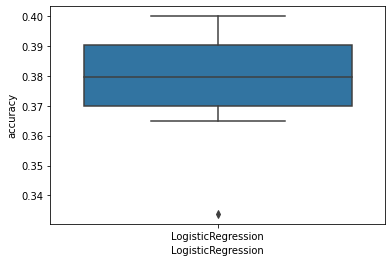

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='LogisticRegression', y='accuracy', data=cv_df)
plt.show()